## **[Soal 1]**


Memuat graph dan adjacency matrix lalu mengimplementasikannya dengan algoritma shortest path berikut:
- Dijkstra’s Algorithm
- A* Algorithm (dengan 2 pendekatan heuristik)
- Bellman-Ford & Floyd-Warshall Algorithm
- Johnson’s Algorithm

Import beberapa library yang dibutuhkan:

In [42]:
import numpy as np
import networkx as nx
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

Membuat fungsi untuk adjacency matriks berukuran 15x15 :

In [44]:
def generate_adjacency_matrix(size=15, max_weight=20, density=0.3):
    matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if i != j and random.random() < density:
                matrix[i][j] = random.randint(1, max_weight)
    return matrix

Fungsi untuk memvisualisasikan adjacency matrix :

In [56]:
def visualize_adjacency_matrix(matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt=".0f", linewidths=0.5, cbar=True)
    plt.title("Adjacency Matrix Visualization")
    plt.xlabel("Nodes")
    plt.ylabel("Nodes")
    plt.show()

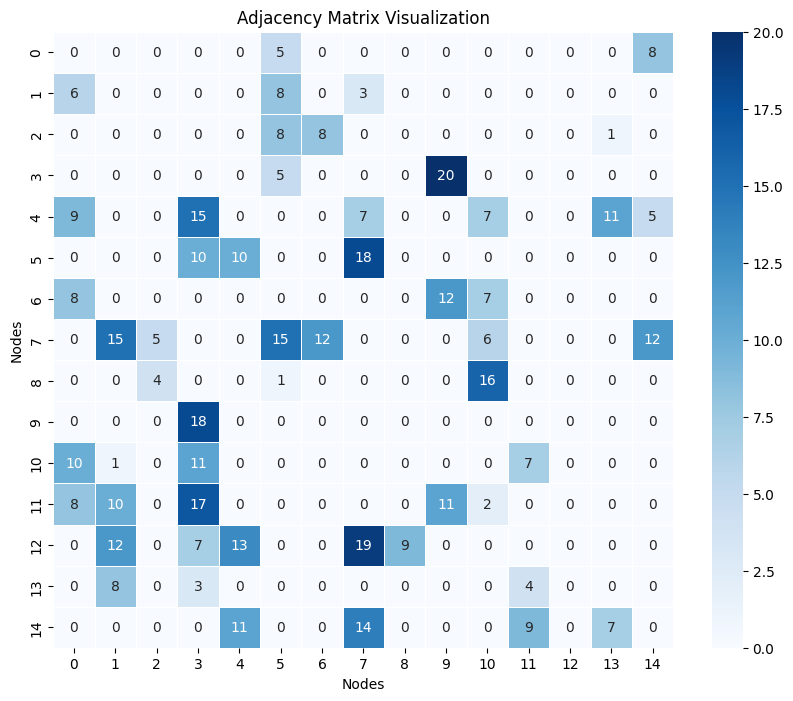

In [57]:
adj_matrix = generate_adjacency_matrix()
visualize_adjacency_matrix(adj_matrix)

Membuat fungsi untuk mengonversi matriks ke graph Networkx:

In [47]:
def create_graph(matrix):
    G = nx.DiGraph()
    size = len(matrix)
    for i in range(size):
        for j in range(size):
            if matrix[i][j] > 0:
                G.add_edge(i, j, weight=matrix[i][j])
    return G

G = create_graph(adj_matrix)

Memvisualisasikan graph:

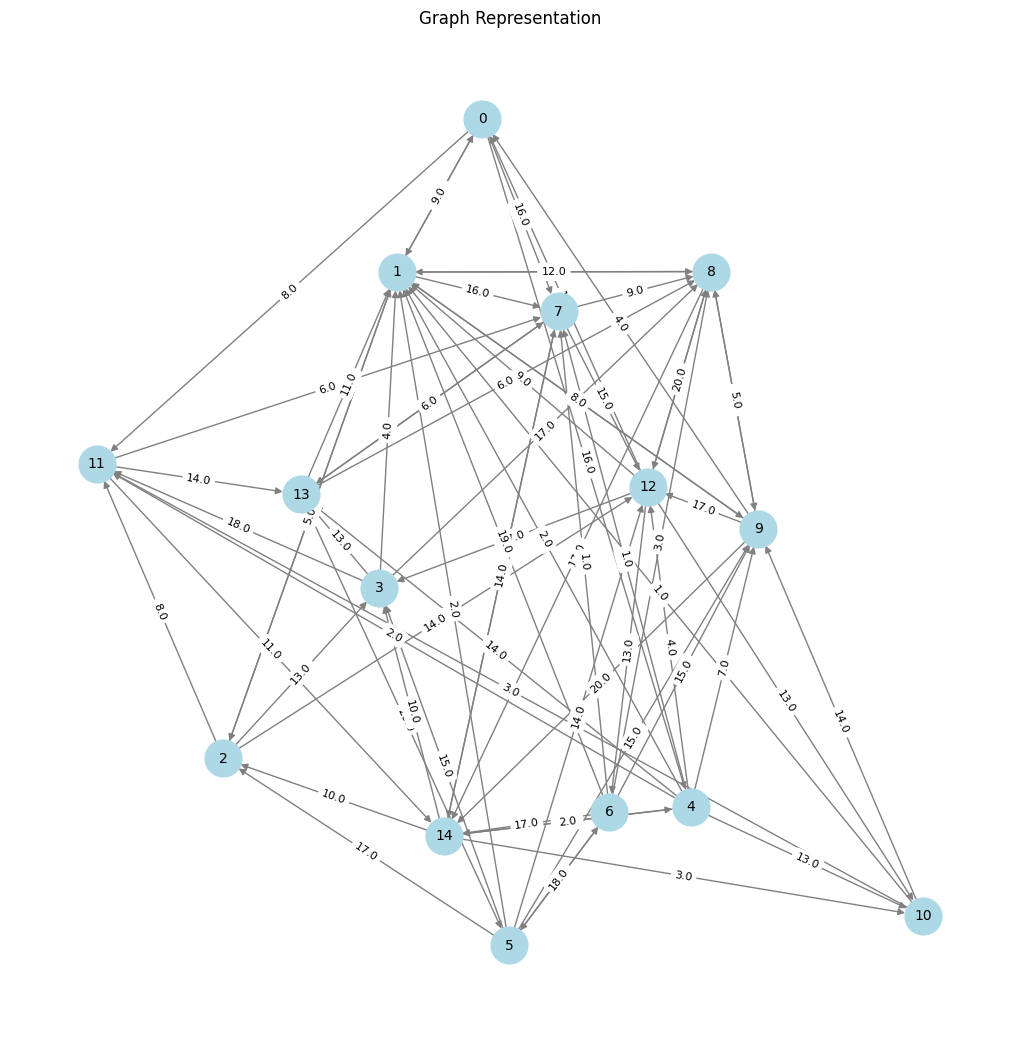

In [59]:
def draw_graph(graph):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph)  # Posisi node menggunakan layout spring
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)

    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Graph Representation")
    plt.show()

draw_graph(G)

Berikut fungsi untuk menghitung waktu eksekusi algoritma

In [49]:
def measure_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    return result, end_time - start_time

**Implementasi Algortima Shortest Path**


Dijkstra Algorithm

In [50]:
def dijkstra_shortest_paths(graph, source):
    return nx.single_source_dijkstra_path_length(graph, source)

source = 0
target = 14

dijkstra_result, dijkstra_time = measure_time(dijkstra_shortest_paths, G, source)

print("Dijkstra's Result:", dijkstra_result, "Time:", dijkstra_time)

Dijkstra's Result: {0: 0, 11: np.float64(8.0), 1: np.float64(12.0), 7: np.float64(14.0), 4: np.float64(16.0), 9: np.float64(18.0), 14: np.float64(19.0), 13: np.float64(20.0), 12: np.float64(20.0), 10: np.float64(22.0), 8: np.float64(23.0), 2: np.float64(29.0), 3: np.float64(29.0), 6: np.float64(33.0), 5: np.float64(40.0)} Time: 0.00022649765014648438


A* Algorthm dengan dua pendekatan Heuristic

In [51]:
def heuristic_manhattan(u, v):
    return abs(u - v)

def heuristic_euclidean(u, v):
    return ((u - v) ** 2) ** 0.5

def a_star_shortest_path(graph, source, target, heuristic):
    return nx.astar_path_length(graph, source, target, heuristic=heuristic)

source = 0
target = 14

a_star_result_manhattan, a_star_time_manhattan = measure_time(a_star_shortest_path, G, source, target, heuristic_manhattan)
a_star_result_euclidean, a_star_time_euclidean = measure_time(a_star_shortest_path, G, source, target, heuristic_euclidean)

print("A* Manhattan Result:", a_star_result_manhattan, "Time:", a_star_time_manhattan)
print("A* Euclidean Result:", a_star_result_euclidean, "Time:", a_star_time_euclidean)

A* Manhattan Result: 19.0 Time: 0.0001819133758544922
A* Euclidean Result: 19.0 Time: 6.723403930664062e-05


Bellman-Ford Algorithm

In [52]:
def bellman_ford_shortest_paths(graph, source):
    return nx.single_source_bellman_ford_path_length(graph, source)

source = 0
target = 14

bellman_ford_result, bellman_ford_time = measure_time(bellman_ford_shortest_paths, G, source)
print("Bellman-Ford Result:", bellman_ford_result, "Time:", bellman_ford_time)

Bellman-Ford Result: {0: 0, 1: np.float64(12.0), 4: np.float64(16.0), 7: np.float64(14.0), 11: np.float64(8.0), 2: np.float64(29.0), 8: np.float64(23.0), 9: np.float64(18.0), 10: np.float64(22.0), 12: np.float64(20.0), 13: np.float64(20.0), 14: np.float64(19.0), 3: np.float64(29.0), 6: np.float64(33.0), 5: np.float64(40.0)} Time: 0.0001697540283203125


Floyd-Warshall Algorithm

In [53]:
def floyd_warshall_all_pairs(graph):
    return dict(nx.floyd_warshall(graph))

source = 0
target = 14

floyd_warshall_result, floyd_warshall_time = measure_time(floyd_warshall_all_pairs, G)
print("Floyd-Warshall Result:", floyd_warshall_result[source], "Time:", floyd_warshall_time)

Floyd-Warshall Result: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7a7f8d516340>, {0: 0, 1: np.float64(12.0), 4: np.float64(16.0), 7: np.float64(14.0), 11: np.float64(8.0), 2: np.float64(29.0), 8: np.float64(23.0), 9: np.float64(18.0), 3: np.float64(29.0), 12: np.float64(20.0), 13: np.float64(20.0), 10: np.float64(22.0), 14: np.float64(19.0), 5: np.float64(40.0), 6: np.float64(33.0)}) Time: 0.0010764598846435547


Johnson Algorothm

In [54]:
def johnson_all_pairs(graph):
    return dict(nx.johnson(graph))

source = 0
target = 14

johnson_result, johnson_time = measure_time(johnson_all_pairs, G)
print("Johnson's Result:", johnson_result[source], "Time:", johnson_time)

Johnson's Result: {0: [0], 1: [0, 1], 4: [0, 4], 7: [0, 11, 7], 11: [0, 11], 13: [0, 11, 7, 13], 14: [0, 11, 14], 2: [0, 1, 2], 8: [0, 11, 7, 8], 9: [0, 1, 9], 12: [0, 4, 12], 10: [0, 11, 14, 10], 3: [0, 11, 14, 3], 5: [0, 11, 7, 13, 5], 6: [0, 4, 12, 6]} Time: 0.0011887550354003906


Membuat analisis berdasarkan performa algoritme yang dipakai menggunakan tabel:

In [55]:
analysis_table = """
Algorithm        | Time Complexity         | Kelebihan                                  | Kekurangan
-----------------------------------------------------------------------------------------------------------------------------
Dijkstra         | O((V + E) log V)        | Efisien untuk graf jarang                  | Tidak bisa menangani bobot negatif
A* (Manhattan)   | O((V + E) log V)        | Menggunakan heuristik untuk optimasi       | Pemilihan heuristik mempengaruhi performa
A* (Euclidean)   | O((V + E) log V)        | Lebih akurat dibanding Manhattan           | Bisa lebih mahal secara komputasi
Bellman-Ford     | O(VE)                   | Bisa menangani bobot negatif               | Lebih lambat dibanding Dijkstra
Floyd-Warshall   | O(V^3)                  | Menghitung semua pasangan jalur terpendek  | Tidak efisien untuk graf besar
Johnson          | O(V^2 log V + VE)       | Efisien untuk semua pasangan jalur         | Implementasi lebih kompleks
"""
print(analysis_table)


Algorithm        | Time Complexity         | Kelebihan                                  | Kekurangan
-----------------------------------------------------------------------------------------------------------------------------
Dijkstra         | O((V + E) log V)        | Efisien untuk graf jarang                  | Tidak bisa menangani bobot negatif
A* (Manhattan)   | O((V + E) log V)        | Menggunakan heuristik untuk optimasi       | Pemilihan heuristik mempengaruhi performa
A* (Euclidean)   | O((V + E) log V)        | Lebih akurat dibanding Manhattan           | Bisa lebih mahal secara komputasi
Bellman-Ford     | O(VE)                   | Bisa menangani bobot negatif               | Lebih lambat dibanding Dijkstra
Floyd-Warshall   | O(V^3)                  | Menghitung semua pasangan jalur terpendek  | Tidak efisien untuk graf besar
Johnson          | O(V^2 log V + VE)       | Efisien untuk semua pasangan jalur         | Implementasi lebih kompleks



# [Soal 2]

Membuat daftar adjacency matriks dengan 10 nodes berbobot dan implementasi algortima MST dengan menggunakan :
- Kruskal Algorithm
- Prims Algorithm

Import beberapa library yang diperlukan -->

In [14]:
import random
import heapq
import time
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

Fungsi untuk menambahkan bobot tepi ke adjacency matriks :

In [16]:
def add_edge(graph, adj_list, adj_matrix, u, v, w):
    graph.append((w, u, v))
    adj_list[u].append((v, w))
    adj_list[v].append((u, w))
    adj_matrix[u][v] = w
    adj_matrix[v][u] = w  # karena graf tidak berarah

Fungsi implementasi Kruskal’s Algorithm:

In [17]:
def kruskal_mst(graph, V):
    start_time = time.time()
    graph.sort()
    parent = {i: i for i in range(V)}
    rank = {i: 0 for i in range(V)}

    def find(v): # fungsi find untuk mencari root dalam union
        if parent[v] != v:
            parent[v] = find(parent[v])
        return parent[v]

    def union(v1, v2): # fungsi untuk menggabungkan dua himpunan
        root1, root2 = find(v1), find(v2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            else:
                parent[root1] = root2
                if rank[root1] == rank[root2]:
                    rank[root2] += 1

    mst = []
    for w, u, v in graph:
        if find(u) != find(v):
            union(u, v)
            mst.append((u, v, w))

    end_time = time.time()
    return mst, end_time - start_time

Fungsi implementasi Prim’s Algorithm:

In [18]:
def prim_mst(adj_list, V):
    start_time = time.time()
    visited = set()
    mst = []
    min_heap = [(0, 0, -1)]  # (weight, vertex, parent)
    while min_heap and len(visited) < V:
        w, u, parent = heapq.heappop(min_heap)
        if u in visited:
            continue
        visited.add(u)
        if parent != -1:
            mst.append((parent, u, w))
        for v, weight in adj_list[u]: # menambahkan tepi baru ke heap
            if v not in visited:
                heapq.heappush(min_heap, (weight, v, u))

    end_time = time.time()
    return mst, end_time - start_time

Fungsi untuk memvisualisasikan graph:

In [19]:
def draw_graph(edges, title):
    G = nx.Graph()
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

Fungsi untuk memvisualisasikan adjecency matriks :

In [21]:
def print_adjacency_matrix(matrix):
    print("Adjacency Matrix:")
    for row in matrix:
        print(" ".join(f"{val:2}" for val in row))
    print()

def draw_adjacency_matrix(matrix, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.matshow(matrix, cmap="coolwarm")
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            ax.text(j, i, str(matrix[i][j]), va='center', ha='center', color='black')
    plt.title(title)
    plt.xlabel("Node Index")
    plt.ylabel("Node Index")
    plt.show()

Fungsi untuk membuat graf acak 10 nodes dan 15 sisi :

In [60]:
V = 10
graph = []
adj_list = defaultdict(list)
adj_matrix = [[0] * V for _ in range(V)]

for _ in range(15):
    u, v = random.sample(range(V), 2)
    w = random.randint(1, 20)
    add_edge(graph, adj_list, adj_matrix, u, v, w)

Print adjacency matriks :

Adjacency Matrix:
 0  0  0  2  0  0  0  0  0 10
 0  0  0  0  8  5  1 16  0  0
 0  0  0  5  0  0  0  0  0  0
 2  0  5  0  0  0  0 17  0  0
 0  8  0  0  0 20  0 16  0  0
 0  5  0  0 20  0  0  9  0  0
 0  1  0  0  0  0  0  0 12  0
 0 16  0 17 16  9  0  0 10  0
 0  0  0  0  0  0 12 10  0  0
10  0  0  0  0  0  0  0  0  0



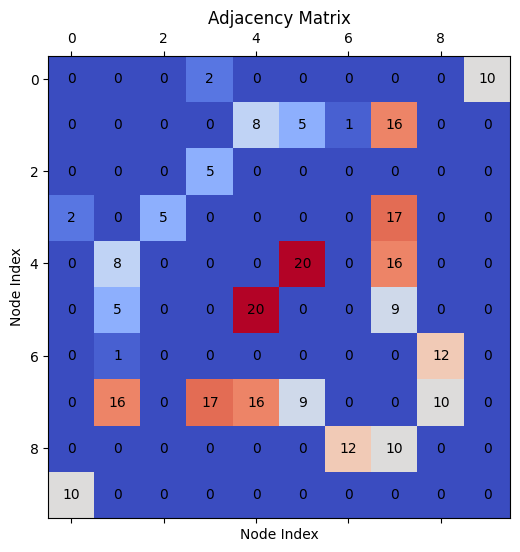

In [23]:
print_adjacency_matrix(adj_matrix)
draw_adjacency_matrix(adj_matrix, "Adjacency Matrix")

Visualisasi graph awal sebelum MST dijalankan :

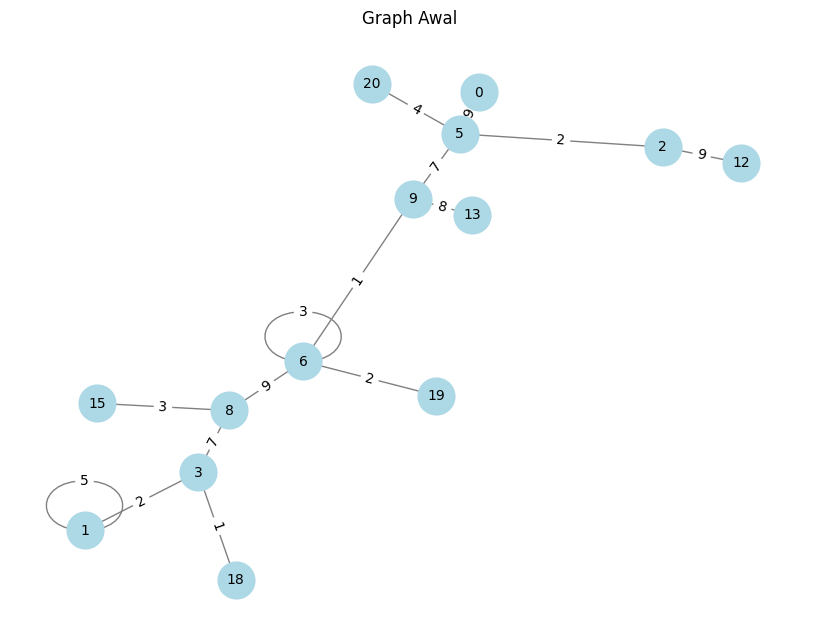

In [13]:
draw_graph(graph, "Graph Awal")

Visualisasi dan eksekusi algoritma Kruskal :

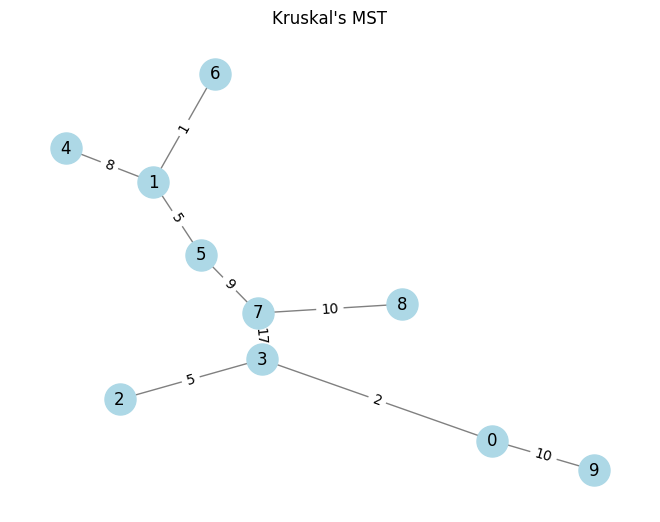

Kruskal's MST: [(6, 1, 1), (0, 3, 2), (1, 5, 5), (3, 2, 5), (4, 1, 8), (5, 7, 9), (7, 8, 10), (9, 0, 10), (3, 7, 17)]
Execution Time: 3.647804260253906e-05 seconds


In [24]:
kruskal_result, kruskal_time = kruskal_mst(graph, V)
draw_graph(kruskal_result, "Kruskal's MST")

print("Kruskal's MST:", kruskal_result)
print("Execution Time:", kruskal_time, "seconds")

Visualisasi dan eksekusi algoritma Prims :

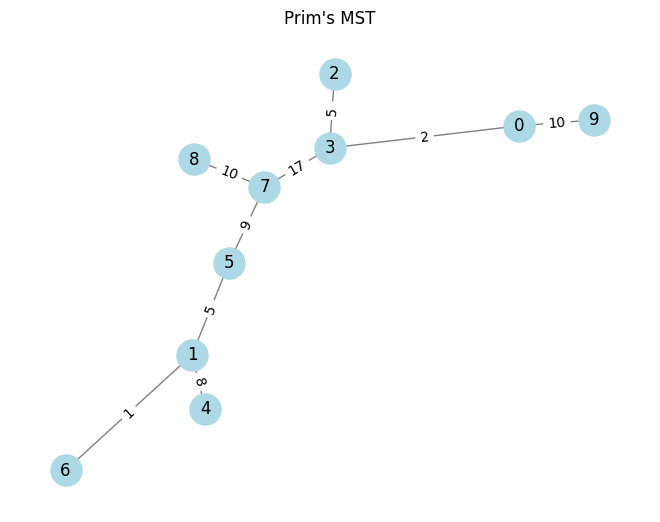

Prim's MST: [(0, 3, 2), (3, 2, 5), (0, 9, 10), (3, 7, 17), (7, 5, 9), (5, 1, 5), (1, 6, 1), (1, 4, 8), (7, 8, 10)]
Execution Time: 4.0531158447265625e-05 seconds


In [25]:
prim_result, prim_time = prim_mst(adj_list, V)
draw_graph(prim_result, "Prim's MST")

print("Prim's MST:", prim_result)
print("Execution Time:", prim_time, "seconds")

Analisis performa algoritma yang dipakai dengan tabel :

In [27]:
analysis = """
| Algorithm | Time Complexity |                 Space Complexity                 |    Best for   |
|-----------|-----------------|--------------------------------------------------|---------------|
| Kruskal   | O(E log E)      | O(E + V)                                         | Graf Jarang   |
| Prim      | O(E + V log V)  | O(V^2) (Adj Matrix) or O(E + V log V) (Adj List) | Graf Padat    |
"""
print(analysis)


| Algorithm | Time Complexity |                 Space Complexity                 |    Best for   |
|-----------|-----------------|--------------------------------------------------|---------------|
| Kruskal   | O(E log E)      | O(E + V)                                         | Graf Jarang   |
| Prim      | O(E + V log V)  | O(V^2) (Adj Matrix) or O(E + V log V) (Adj List) | Graf Padat    |

